# TAREFA 7 - Algoritmo Imunológico

<ul>
<li>Diego Santos Gonçalves - 20183012537</li>
<li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>

Para executar este notebook, é necessária a instalação das seguintes bibliotecas:
<ul>
<li>numpy </li>
<li>pandas</li>
<li>random </li>
<li>matplotlib - para criação dos gráficos </li>
<li>mpl_toolkits - para criação dos gráficos 3d</li>
<li>tqdm - para barra progresso </li>
</ul>

In [1]:
from tqdm import tqdm
import math
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Função Objetivo
Nós implementamos a função objetivo dada para o problema: função alpine 02. Neste caso nossa função terá apenas duas entradas (x1, x2).

In [2]:
# Funcao Objetivo
def f_alpine02(x):
    resultado = 1
    for i, x_i in x.iteritems():
        resultado = resultado * math.sin(x_i) * math.sqrt(x_i)
    return resultado

## Função Fitness
Irá usar a função alpine_02 para calcular o fitness dos anticorpos. Como a função alpine_02 pode retornar valores negativos, há um deslocamento no resultado final para contornar esse problema.

In [3]:
def avaliar(populacao): # fitness
    arr = []
    limiar = 10
    for i, row in populacao.iterrows():
        resultado = f_alpine02(row) + limiar
        arr.append(resultado)
    return arr    

## Seleção
A função ```selecionar()``` seleciona o maior fitness de um conjunto de clones da população de anti-corpos. Assim, se o número de clones for 5, por exemplo, irá selecionar o maior fitness de cada subconjunto de clones. 

In [4]:

def selecionar(populacao, n1, f, n_clones = 1): #seleciona o maior fitness
    populacao['aux'] = f
    nova_populacao = pd.DataFrame()
    aux = pd.DataFrame()
    for i,row in populacao.iterrows():
        aux = aux.append(row)
        if (i+1)%n_clones == 0:
            nova_populacao = nova_populacao.append(aux.sort_values('aux',ascending=False).head(1))
            aux = pd.DataFrame()
    
    return nova_populacao.reset_index(drop=True).drop(["aux"], axis=1)

## Clone
A função ```clone()```, irá replicar os anticorpos da população pelo número passado como parâmetros. Dessa forma, se forem ter 2 clones por anticorpo em uma população de 100 anticorrpos, irão resultar 200 clones.

In [5]:
def clone(P1, f, n_clones): # proporcional aos anticorpos
    C = pd.DataFrame(columns=['X1', 'X2'])
    for i, row in P1.iterrows():
        for j in range(n_clones):
            C = C.append(row)
    return C.reset_index(drop=True)

## Mutação
A função ```mutacao()```, retorna o grupo de clones que podem ou não terem seus atributos alterados de acordo com a taxa de mutação. A taxa de mutação será inversamente proporcional a afinidade do anticorpo, ela é calculada com base no exponencial da razão entre o fitness do anticorpo e o fitness máximo daquela populacao multiplicados por uma constante negativa. Para cada atributo do anticorpo é testado essa taxa e caso passe será alterado o valor.

In [6]:
def mutacao(C, f, p, n_clones): 
    arr = []
    for i, row in C.iterrows():
        d = f[math.floor(i/n_clones)]
        d_max = max(f)
        d_star = d / d_max
        alpha = math.exp(-p*d_star)
        line = []
        for j, xj in row.iteritems():
            rand = np.random.random()
            if rand < alpha:
                xj = np.random.uniform(0.0, 10.0)
            line.append(xj)
        arr.append(line)
    C1 = pd.DataFrame(data=arr, columns=['X1', 'X2'])
    return C1

# Substituição
Irá substituir os piores anticorpos da população por outros. No caso do exercício, está função não será utilizada (n2 = 0).

In [7]:
def substituir(P1, n2):
    P1['aux'] = avaliar(P1)
    P1 = P1.sort_values('aux', ascending=True).drop('aux', axis = 1).reset_index(drop=True)
    for i in range(n2):
        x1 = np.random.uniform(0.0, 10.0)
        x2 = np.random.uniform(0.0, 10.0)
        P1.loc[i, ['X1','X2']] = [x1, x2]
    return P1

## Gráficos
As função abaixos foram utilizados para criação dos gráficos. Nele usamos o gráfico de curvas de nível para visualizar os máximos e mínimos da função de melhor forma.

In [8]:
def func(X,Y):
    arr = []
    for x in X:
        line = []
        for y in Y:
            line.append(math.sin(x) * math.sqrt(x)*math.sin(y) * math.sqrt(y))
        arr.append(line)
    return arr

In [9]:
def plot_geracao_3d(df, iteracao):
    populacao = df.copy()
    populacao['fx'] = populacao.apply(f_alpine02, axis=1)
    if iteracao%10 == 0:
        print("Iteracao: ", iteracao)
        fig = plt.figure(figsize= (16,9))
        ax = plt.axes(projection = '3d')
        
        X = np.linspace(0,10,40)
        Y = np.linspace(0,10,40)
        Z = func(X,Y)
        X,Y = np.meshgrid(X,Y)
        
        ax.contour3D(X, Y, Z, 40, cmap='binary', alpha = 0.2)
                
        ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)
        
        my_cmap = plt.get_cmap('hsv')
        
        sctt = ax.scatter3D(populacao['X1'],populacao['X2'], populacao["fx"], alpha = 0.8, c=populacao["fx"], cmap= my_cmap, marker = '.')
        
        plt.title(f"Funcao alpine2 - iteracao {iteracao}")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1,x2)')
        fig.colorbar(sctt, ax=ax, shrink= 0.5, aspect = 5)
        
        plt.show()
        plt.clf()
        plt.close()

In [10]:
def plot_grafico(df, t):
    populacao = df.copy()
    populacao['fx'] = populacao.apply(f_alpine02, axis=1)
    if t%10 == 0:
        plt.rcParams['figure.figsize'] = (16,19)
        plt.style.use('seaborn-bright')
        fig = plt.figure(figsize= (16,9))
        ax = plt.axes()
        plt.title(f"Funcao alpine2 - Geracao {t}")
        X = np.linspace(0,10,40)
        Y = np.linspace(0,10,40)
        Z = func(X,Y)
        X,Y = np.meshgrid(X,Y)
        
        plt.contour(X, Y, Z)
        
        ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)
        
        my_cmap = plt.get_cmap('hsv')
        
        sctt = ax.scatter(populacao['X1'],populacao['X2'], populacao["fx"], alpha = 1, linewidth = 6, c=populacao["fx"], cmap= my_cmap, marker = '.')
        
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        fig.colorbar(sctt, ax=ax, shrink= 0.5, aspect = 5)
        fig.set_size_inches(18.5, 10.5)
        plt.show()
        plt.clf()
        plt.close()

## Algoritmo Clonal Multimodal
Como podemos ver nos resultados, não há uma convergência para um valor único mas sim uma aproximação nos ótimos  locais com o passar das iterações. O objetivo do multimodal não é somente obter o ótimo global, mas também ótimos locais mantendo a diversidade de soluções. 

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Iteracao:  0


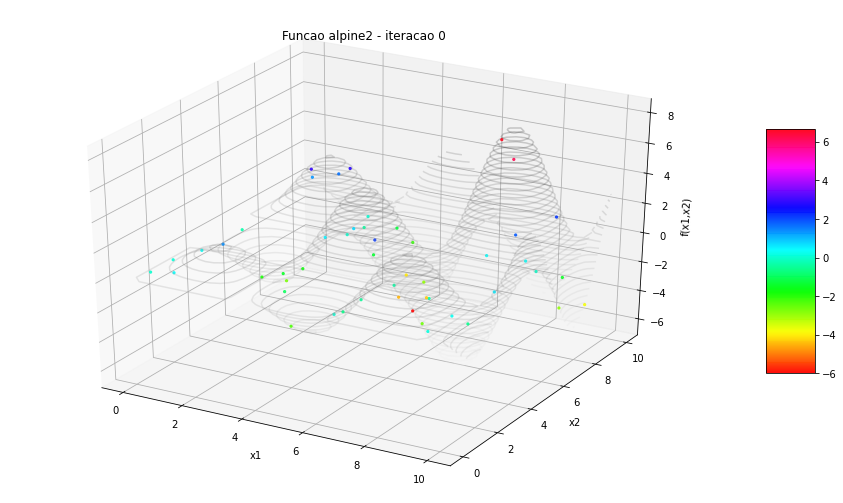

C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


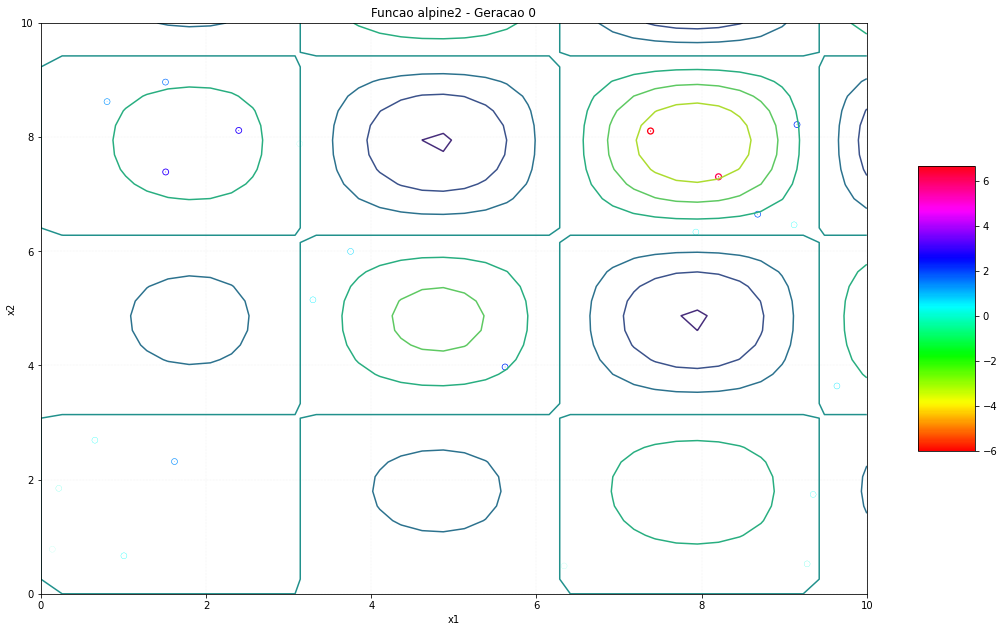

 20%|██        | 10/50 [00:11<00:41,  1.04s/it]C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Iteracao:  10


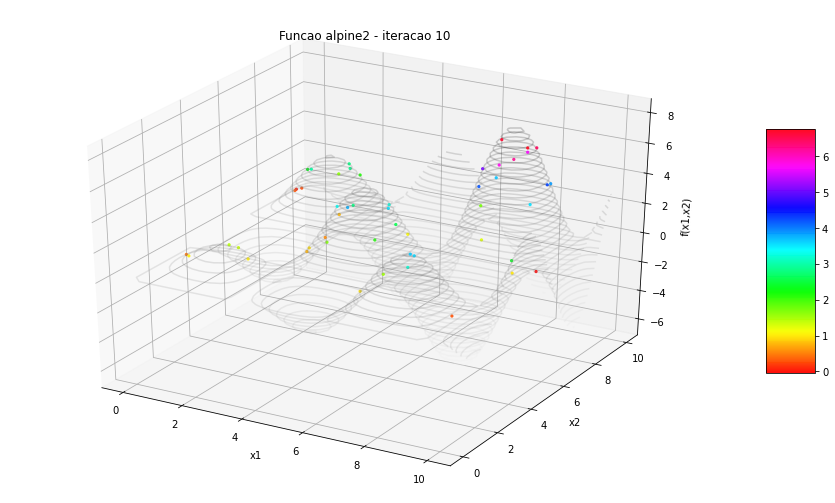

C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


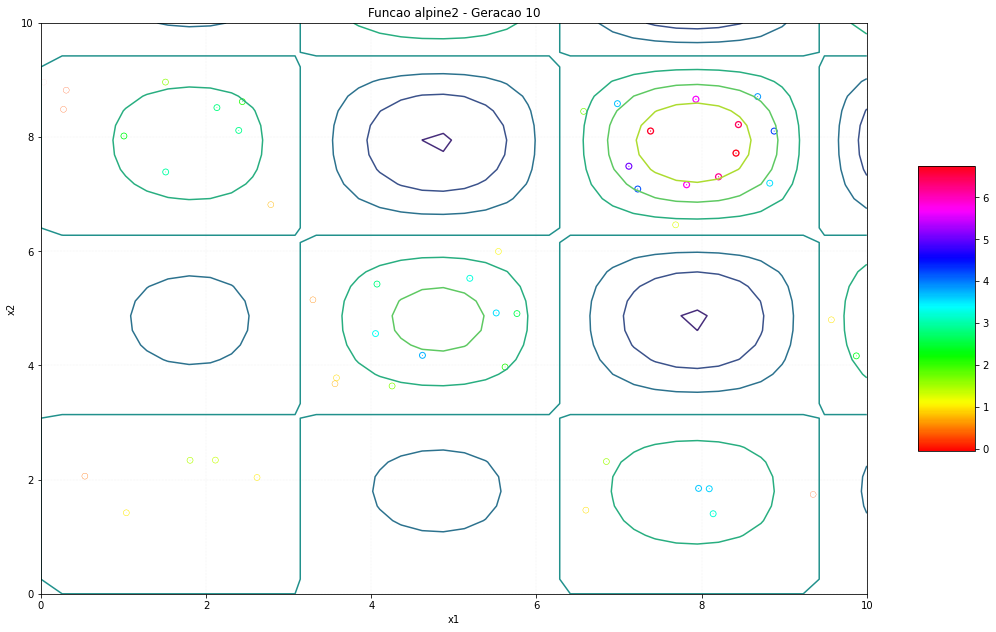

 40%|████      | 20/50 [00:22<00:31,  1.06s/it]C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Iteracao:  20


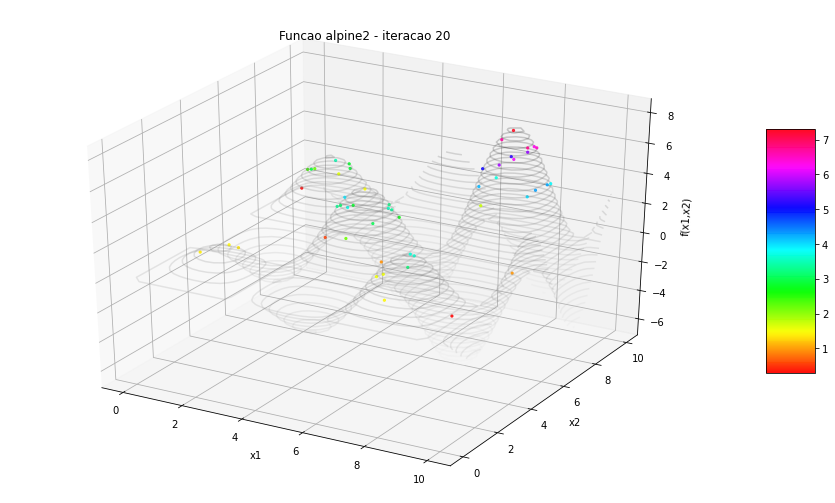

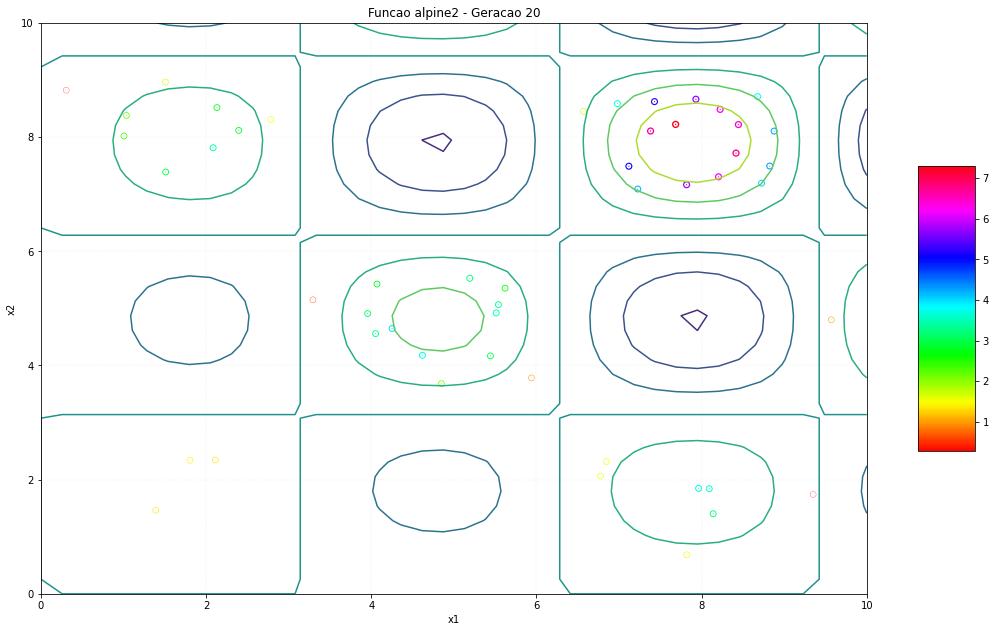

 60%|██████    | 30/50 [00:33<00:20,  1.02s/it]C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Iteracao:  30


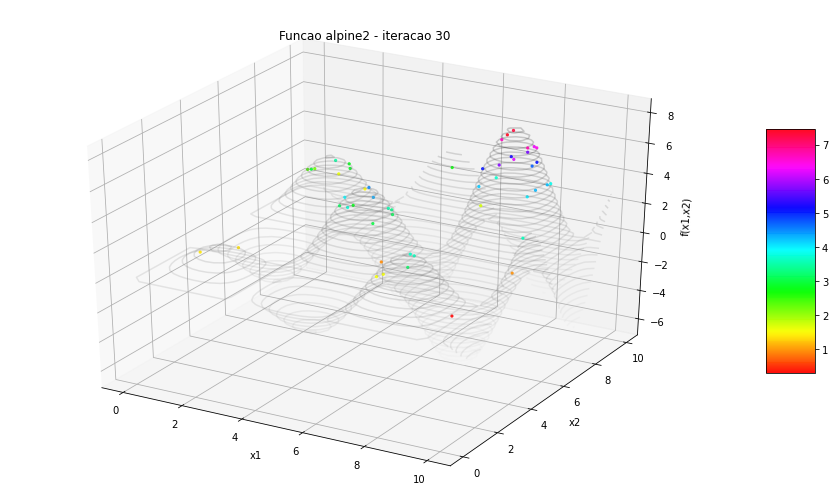

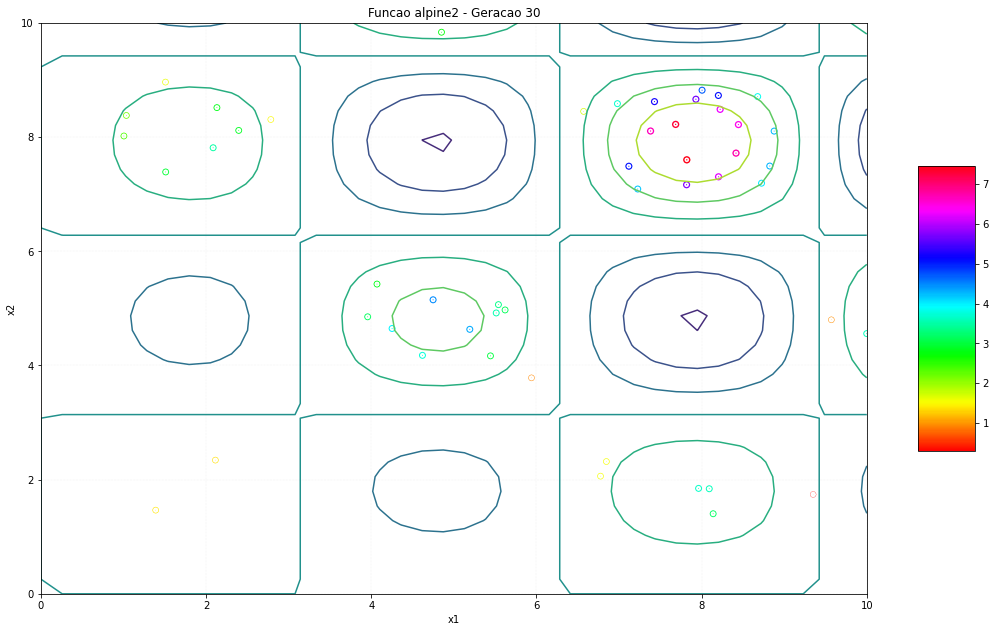

 80%|████████  | 40/50 [00:46<00:12,  1.28s/it]C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Iteracao:  40


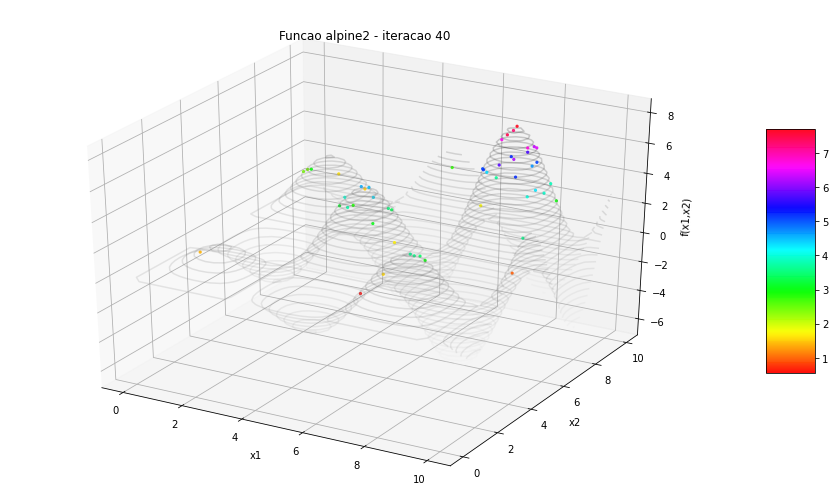

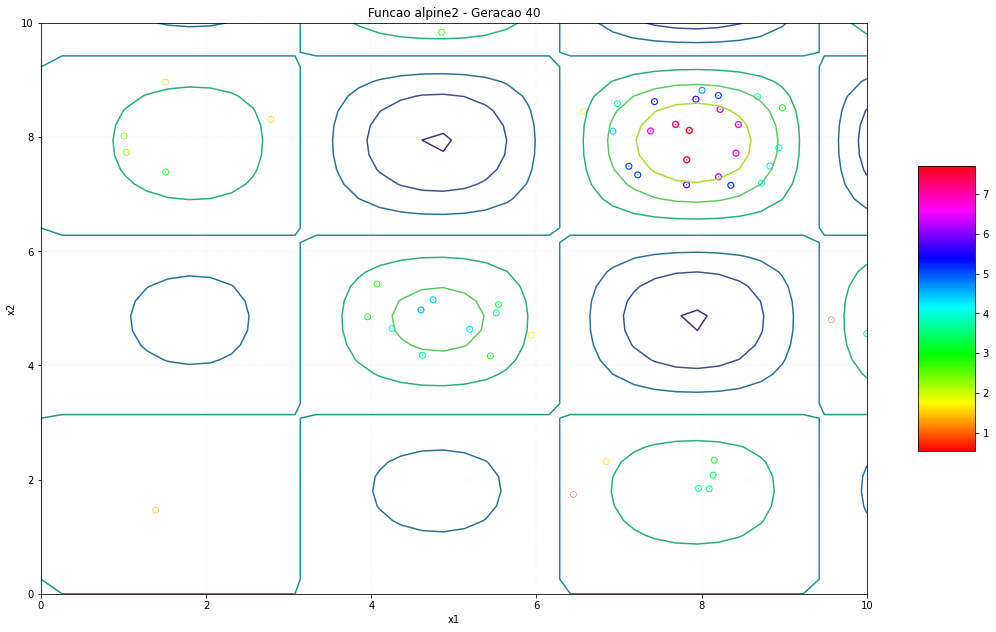

100%|██████████| 50/50 [01:00<00:00,  1.21s/it]
C:\Users\disan\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


População final: 
          X1        X2
0   1.325012  1.740534
1   2.783368  8.309395
2   2.089519  1.915770
3   6.571089  8.451757
4   6.820386  8.965014
5   4.850175  9.838926
6   4.069123  5.426311
7   8.978436  8.517860
8   1.510468  7.390513
9   5.443286  4.168569
10  3.956145  4.853096
11  5.539507  5.066124
12  4.105829  4.531210
13  5.512932  4.920510
14  8.092444  1.840668
15  9.999283  4.558782
16  7.963276  1.846864
17  4.619595  4.177754
18  6.846979  7.872488
19  8.934592  7.814789
20  6.980608  7.321040
21  4.251946  4.648083
22  8.725521  7.194029
23  6.875476  8.020666
24  8.824833  7.494244
25  5.192734  4.633339
26  6.926558  8.106461
27  8.678594  8.585578
28  4.748449  5.151071
29  4.601983  4.973061
30  4.647360  4.800350
31  8.005459  8.822927
32  7.119020  7.491135
33  8.202828  8.730782
34  7.226274  7.339735
35  8.353837  7.157064
36  7.429255  8.623029
37  7.930692  8.664879
38  7.817864  7.166742
39  8.139744  8.547636
40  8.204730  7.305832
41  8.224304  8.

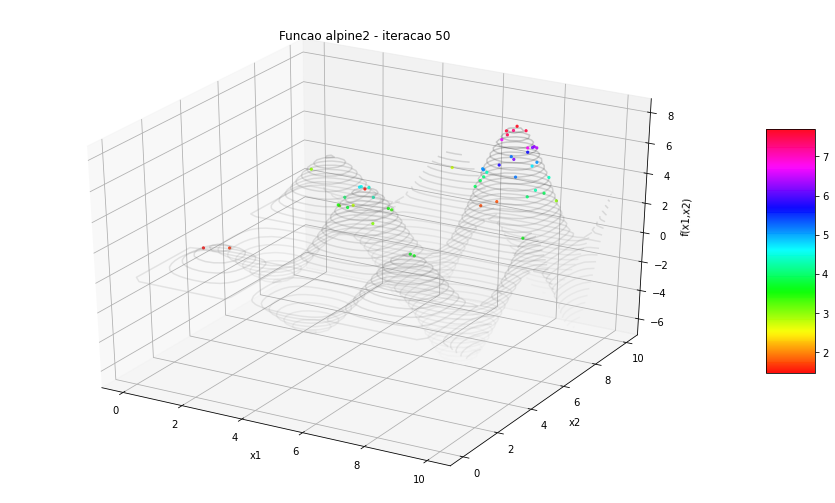

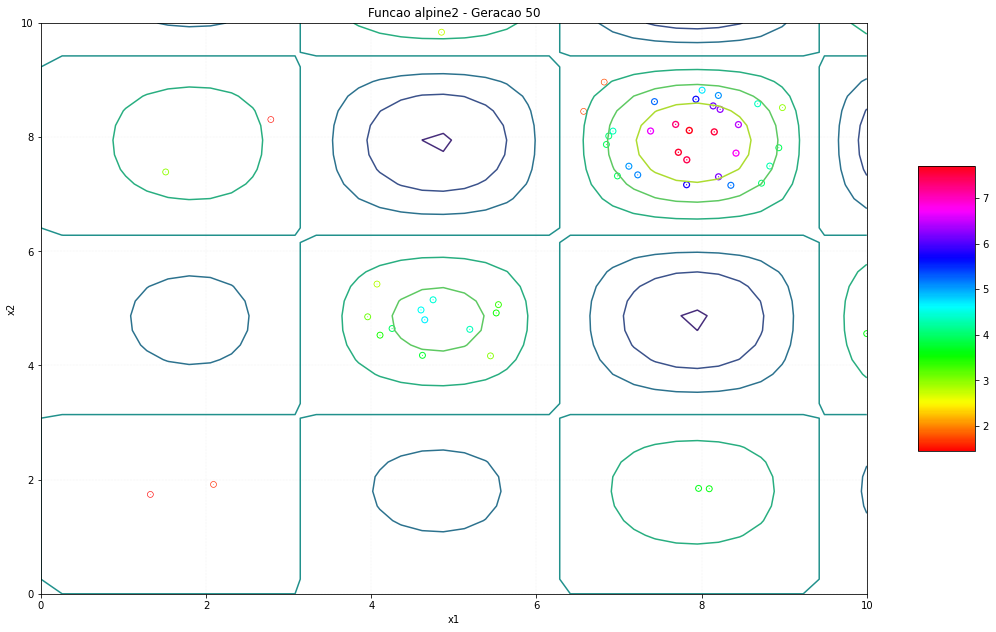

In [11]:
# Parametros do algoritmo imunologico
n1 = 50
n2 = 0
beta = 0.1
n_clones =  round(beta*n1)
p = 5
max_iteracoes = 50

# Cria dataframe e preenche com valores randomicos
populacao = pd.DataFrame(np.random.uniform(0.0, 10.0, size=(n1, 2)), columns=['X1', 'X2'])

for t in tqdm(range(max_iteracoes)):
    plot_geracao_3d(populacao, t)
    plot_grafico(populacao,t)
    f = avaliar(populacao.copy()) # vetor
    P1 = selecionar(populacao.copy(), n1,f)
    C = clone(P1, f, n_clones)
    
    C1 = mutacao(C, f, p, n_clones)
    f1 = avaliar(C1.copy())
    P1 = selecionar(C1.copy(), n1, f1, n_clones)
    populacao = substituir(P1, n2)


print("==========================================")
print("População final: ")
print(populacao)

plot_geracao_3d(populacao, 50)
plot_grafico(populacao,50)